In [1]:
import dynamiqs as dq
import jax.numpy as jnp
from jaxpulse.controllers import *
from jaxpulse.optimizers import *
from gkp_utils.utils import *
import matplotlib.pyplot as plt

In [2]:
logical_one_projector = dq.tensor(dq.todm(logical_one),dq.eye(2))
y_final_direct = lambda y: 100.*(1. - dq.expect(logical_one_projector,y))
def y_statewise(y, u, t):
    y_p = dq.ptrace(y,0,(GKP_N,2))
    return jnp.abs(dq.trace(dq.dag(Pidot_perp(y_p))@Pidot_perp(y_p)))**2
direct_controls = ControlVector(
    [
        GaussianPulseTrain(
            amp=jnp.array([1.0]),
            mean=jnp.array([1.0]),
            sigma=jnp.array([.5]),
            period=jnp.array([2])
        ),
        GaussianPulseTrain(
            amp=jnp.array([1.0]),
            mean=jnp.array([1.0]),
            sigma=jnp.array([.5]),
            period=jnp.array([2])
        ),GaussianPulseTrain(
            amp=jnp.array([1.0]),
            mean=jnp.array([1.0]),
            sigma=jnp.array([.5]),
            period=jnp.array([2])
        ),
        GaussianPulseTrain(
            amp=jnp.array([1.0]),
            mean=jnp.array([1.0]),
            sigma=jnp.array([.5]),
            period=jnp.array([2])
        ),
        PositiveGaussianPulseTrain(
            amp=jnp.array([1.0]),
            mean=jnp.array([1.0]),
            sigma=jnp.array([.5]),
            period=jnp.array([2])
        )
    ]
)
gkp_sys = OpenQuantumSystem(
    H_0=II,
    H_M=[IZ, IX, XZ, PZ],
    U_K=[],
    C_K=[Ia]
)

In [3]:
rho0=dq.tensor(dq.fock_dm(GKP_N,0),dq.fock_dm(2,0))
t1=10.
gkp_direct = OptimalController(
    system=gkp_sys,
    controls=direct_controls,
    y0=rho0,
    y_final=y_final_direct,
    y_statewise=y_statewise,
    duration=t1
)

### Pre-Opt 

/home/cjblake/miniconda3/envs/jiang/lib/python3.12/site-packages/equinox/_jit.py:51: UserWarning: Complex dtype support is work in progress, please read https://github.com/patrick-kidger/diffrax/pull/197 and proceed carefully.
/tmp/ipykernel_13378/1693964137.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


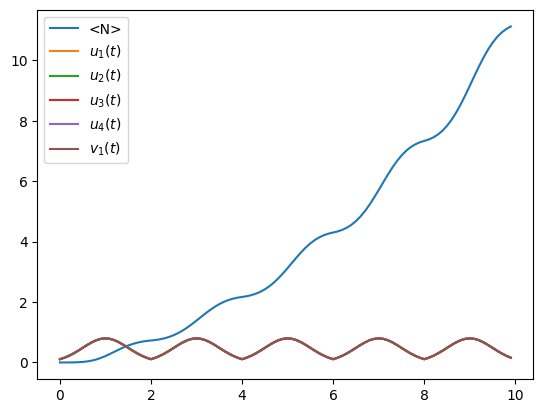

In [4]:
# preopt
fig,ax = plt.subplots()
gkp_direct.plot(ax=ax,exp_ops=[NI],exp_names=["<N>"])
ax.legend()
fig.show()

In [5]:
rhot = gkp_direct.run()
rho_r_t = dq.ptrace(rhot, 0, (GKP_N,2))


/home/cjblake/miniconda3/envs/jiang/lib/python3.12/site-packages/equinox/_jit.py:51: UserWarning: Complex dtype support is work in progress, please read https://github.com/patrick-kidger/diffrax/pull/197 and proceed carefully.


In [7]:
dq.trace(rho_r_t)

Array([1.        +0.00000000e+00j, 1.        +6.61744490e-24j,
       1.        +3.38019086e-20j, 1.        +1.09981934e-20j,
       1.        -8.47032947e-21j, 0.99999994+0.00000000e+00j,
       1.        +1.08420217e-19j, 1.        +0.00000000e+00j,
       1.        +4.33680869e-19j, 1.        -1.38777878e-17j,
       1.        -1.38777878e-17j, 1.0000002 +1.61762964e-16j,
       1.        -2.77555756e-17j, 1.        +3.60822483e-16j,
       1.0000001 -5.55111512e-17j, 1.        +0.00000000e+00j,
       0.99999994+1.11022302e-16j, 1.0000001 -5.55111512e-17j,
       1.        +4.99600361e-16j, 1.        -2.22044605e-16j,
       1.        -6.10622664e-16j, 0.9999999 -5.55111512e-17j,
       1.        +3.88578059e-16j, 0.99999994-4.99600361e-16j,
       1.        -2.22044605e-16j, 1.        +3.33066907e-16j,
       1.        +6.66133815e-16j, 1.        +8.88178420e-16j,
       1.        -8.88178420e-16j, 1.        +1.77635684e-15j,
       1.        -1.77635684e-15j, 1.        -1.7763568

100%|██████████| 50/50 [00:03<00:00, 13.92it/s]


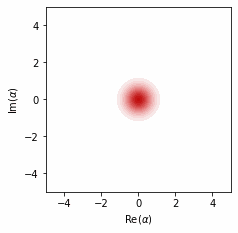

In [8]:
dq.plot.wigner_gif(rho_r_t)

In [ ]:
dq.plot.fock(logical_one)

In [ ]:
dq.plot.wigner(logical_one)

In [ ]:
gkp_opt = gkp_direct.optimize(N_steps=1000,learning_rate=.0025,verbosity=1)

In [ ]:
rho_t_opt = gkp_opt.run()
rho_r_t_opt = dq.ptrace(rho_t_opt, 0, (GKP_N, 2))

In [ ]:
dq.plot.wigner_gif(rho_r_t_opt[:40])

In [ ]:
l1_projector = dq.tensor(dq.todm(logical_one), dq.eye(2))
fig,ax = plt.subplots()
gkp_opt.plot(ax=ax, exp_ops=[l1_projector],exp_names=["L1"])
import equinox as eqx
print(eqx.tree_pprint(gkp_opt.controls,short_arrays=False))
ax.legend()
fig.show()

## Stupid Brain-dead Idea